In [2]:
import numpy as np
import scipy.stats
from scipy.stats import norm, truncnorm, gamma, beta, t
import scipy.special
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import gridspec
from IPython.display import display, Latex, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
FontProp = fm.FontProperties(family='serif', weight='semibold', style='normal', size=12)

barwidth = 0.25

## BMA (Bayesian Model Averaging)

## A BMA question in the final exam of last year
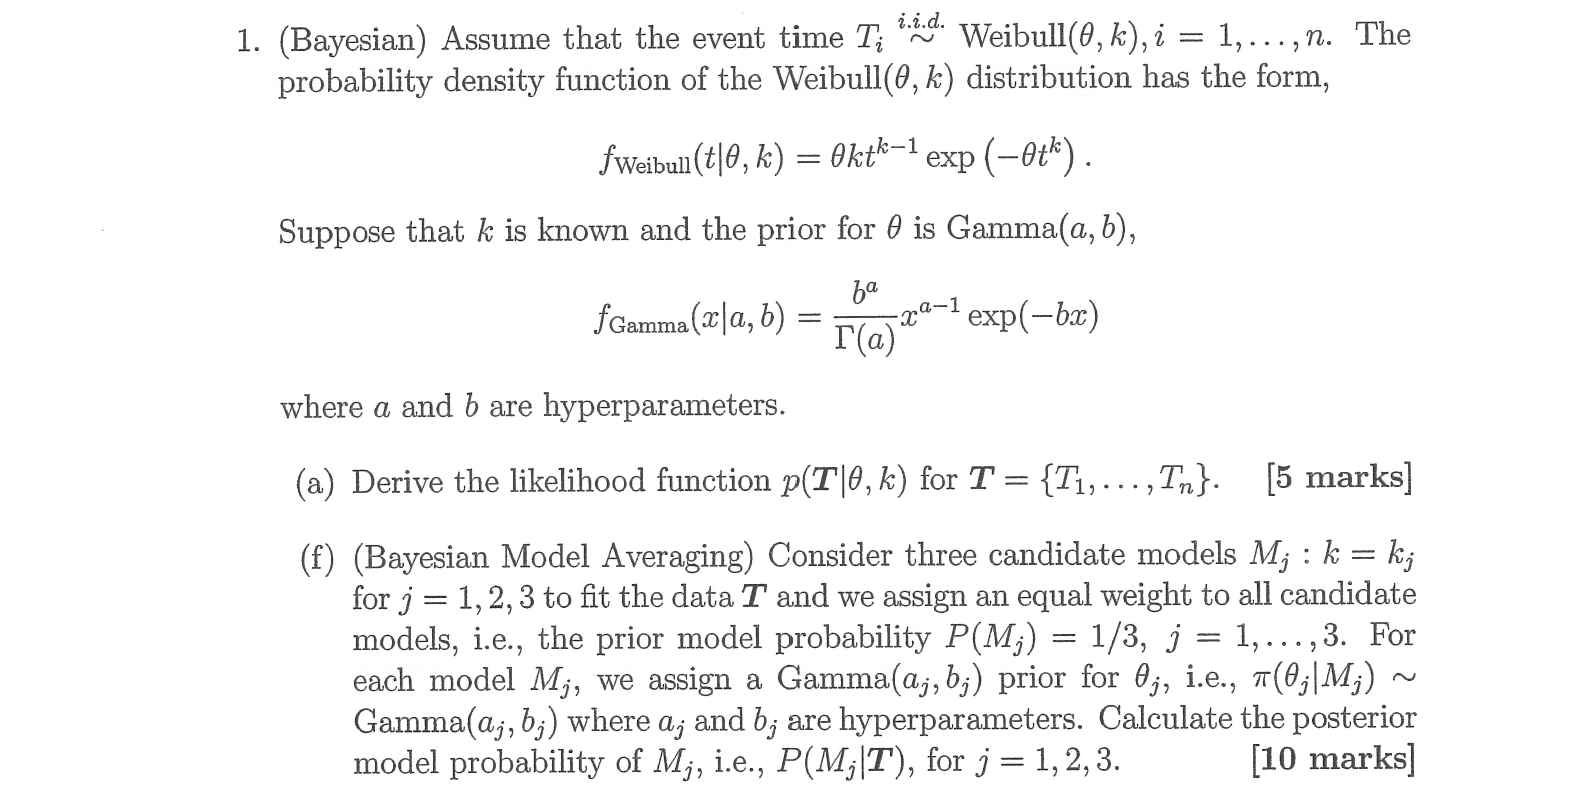

$$
P(T|M) =\int{f( T|\theta) f(\theta |M) d\theta}=\frac{k^n( T_1T_2...T_n) ^{k-1}b^a}{\varGamma(a)}\int{\theta ^{n+a-1}\exp( -( b+\sum_{i=1}^n{T_{i}^{k}}) \theta) d\theta}=\frac{k^n( T_1T_2...T_n) ^{k-1}b^a\varGamma(a+n)}{\varGamma(a) ( b+\sum_{i=1}^n{T_{i}^{k}}) ^{a+n}}
$$
$$So \quad P(T|M_j) =\frac{k^n( T_1T_2...T_n) ^{k-1}b_{j}^{a_j}\varGamma(a_j + n)}{\varGamma( a_j) ( b_j+\sum_{i=1}^n{T_{i}^{k}}) ^{a_j+n}}$$

So $P(M_j|T) = P(T|M_j)P(M_j) \big/ \sum_{i=1}^3{P(T|M_i)P(M_i)} = P(T|M_j)\big/ \sum_{i=1}^3{P(T|M_i)}$ $\quad$ where $P(T|M_j)$ is as above.

## A Example of BMA, multiple prior variables $\beta_k, \sigma^2$
Linear regression with only one predictor $y_i = \beta_kx_{ik} + \epsilon_i, ~ \epsilon_i \sim N(0, \sigma^2), \ 1 \le i \le n, \ 1 \le k \le q$, $k$ means $k$-th model,
<br> Prior
$$    
\begin{align}
		\boldsymbol{Y}|M_k, \beta_k, \boldsymbol{X}_k, \sigma^2 &\sim N(\boldsymbol{X}_k \beta_k, \sigma^2 \boldsymbol{I})\\
	   \beta_k | \sigma^2, \mu_0, \lambda_0 &\sim N(\mu_0, \sigma^2/ \lambda_0)\\
		\sigma^2 | a_0, b_0 &\sim \text{InverseGamma}(a_0, b_0) =\frac{{b_0}^{a_0}}{\Gamma(a_0)} \left(\sigma^2\right)^{-a_0 - 1}  e^{-\frac{b_0}{\sigma^2}}\\
		P(M_j) &= 1 / q
		\end{align}
$$
Introduction to InverseGamma  https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.invgamma.html
<br>Then $(\beta_k,\sigma^2)$ has a joint prior normal-inverse-gamma distribution NIG$(\mu_0, \lambda_0, a_0, b_0)$, $M_k$ means parameter $(\mu_0, \lambda_0, a_0, b_0)$
$$f(\beta_k, \sigma^2 | M_k) = f(\beta_k, \sigma^2 | \mu_0, \lambda_0, a_0, b_0) = \frac{\sqrt{\lambda_0}}{\sigma \sqrt{2\pi}} \frac{{b_0}^{a_0}}{\Gamma(a_0)} \left(\sigma^2\right)^{-a_0 - 1} e^{-\frac{2b_0 + \lambda_0(\beta_k-\mu_0)^2}{2\sigma^2}}$$
Introduction to NIG https://en.wikipedia.org/wiki/Normal-inverse-gamma_distribution

Since $y_i = \beta_{k}x_{ik} +  \epsilon_i \sim N(\beta_{k}x_{ik}, \sigma^2)$, $D$ is the data. 
<br>Posterior $f(\beta_k, \sigma^2 | D, M_k) \propto f(D|\beta_k, \sigma^2, M_k) f(\beta_k,\sigma^2) $, $\quad posterior(\beta_k, \sigma^2|data) \propto f(data|\beta_k, \sigma^2)*prior(\beta_k, \sigma^2)$
<br>So
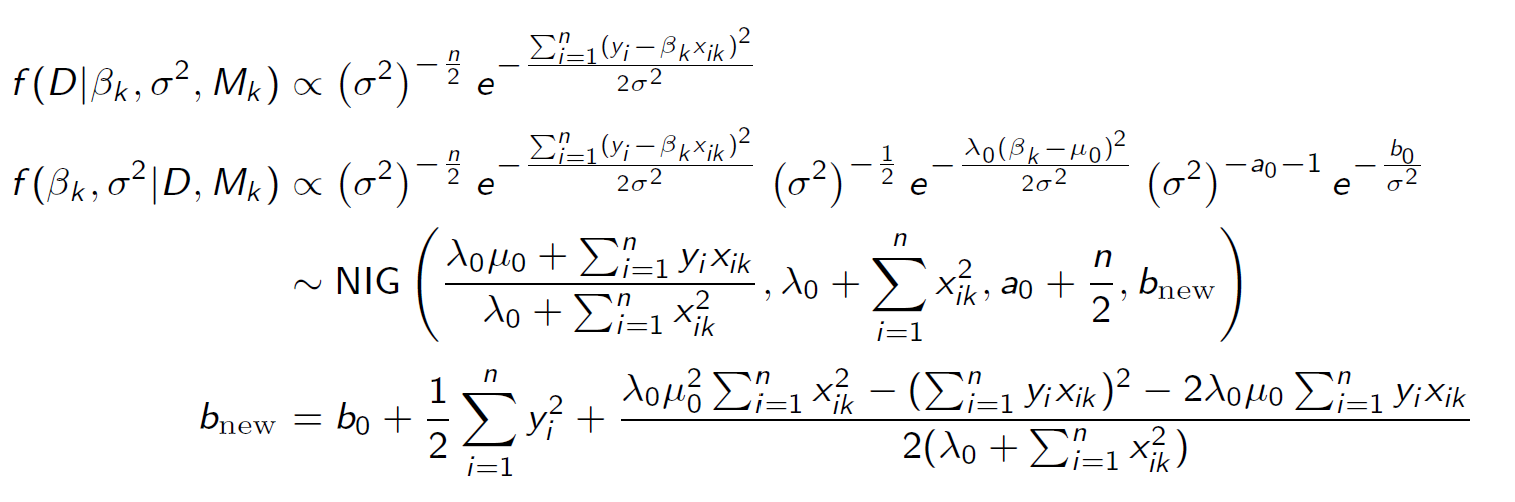

Note that $M_k$ means model parameters $(\mu_0, \lambda_0, a_0, b_0)$, $D$ means data $x_i, y_i$
<br>$P(D|M_k) = P(X,Y|\mu_0, \lambda_0, a_0, b_0)$, please refer to page 10 in tutorial slide for following formula
## Theoretical expression for $P(D|M_k)$ and $P(M_k|D)$
$$
\begin{align*}
		P(D|M_k) &= \int f(D|\beta_k, \sigma^2, M_k) f(\beta_k, \sigma^2 | M_k) d(\beta_k, \sigma^2)\\
		&= \int 
		\frac{\sqrt{\lambda_0}}{\sigma \sqrt{2\pi}} \frac{b_0^{a_0}}{\Gamma(a_0)} \left(\sigma^2\right)^{-a_0 - 1} e^{-\frac{2b_0 + \lambda_0(\beta_k-\mu_0)^2}{2\sigma^2}}
		\left( 2 \pi\sigma^2   \right)^{-\frac{n}{2}} e^{\frac{\sum_{i=1}^n(y_i - x_{ik}\beta_k)^2}{2\sigma^2}}
		d (\beta_k, \sigma^2) \\
		&= \sqrt{\lambda_0} \left( 2 \pi \right)^{-\frac{n+1}{2}}\frac{b_0^{a_0}}{\Gamma(a_0)}
		\int 
		\left( \sigma^2 \right)^{-\frac{n+1}{2} -a_0 - 1} e^{-\frac{\sum_{i=1}^n (y_i  - \beta_k x_{ik})^2}{2\sigma^2}}  e^{-\frac{2b_0 + \lambda_0 (\beta_k - \mu_0)^2}{2\sigma^2}} 
		d (\beta_k, \sigma^2) \\
		&= \frac{\sqrt{\lambda_0}}{\sqrt{\lambda_0 + \sum_{i=1}^n x_{ik}^2}}  \left( 2 \pi \right)^{-\frac{n}{2}} \frac{b_0^{a_0}}{\Gamma(a_0)}  \frac{\Gamma(a_0+n)}{b_{\rm new}^{a_0+\frac{n}{2}}}\\
\end{align*}
$$

## Simulated  $P(D|M_k)$ and $P(M_k|D)$
Draw samples for $\sigma^2$
$$\sigma^2 | a_0, b_0 \sim \text{InverseGamma}(a_0, b_0)$$
Then draw samples for $\beta_k$
$$\beta_k | \sigma^2, \mu_0, \lambda_0 \sim N(\mu_0, \sigma^2/ \lambda_0)$$
Then we can caculate the probability of data D, $\boldsymbol{Y} \sim N(\boldsymbol{X}_k \beta_k, \sigma^2 \boldsymbol{I})$, the mean is $P(D|M_k)$, and $P(M_k|D) = P(D|M_k) \big/ \sum_{k=1}^q{P(D|M_k)}$
$$\boldsymbol{Y}|M_k, \beta_k, \boldsymbol{X}_k, \sigma^2 \sim N(\boldsymbol{X}_k \beta_k, \sigma^2 \boldsymbol{I})$$


## Experiment setting

### Samples Generation
Five covariates:
<br>$(X_1, X_2) \sim N_2 \left( \left(  
	\begin{array}{c}
	0 \\ 0
	\end{array}
	\right), \left(
	\begin{array}{cc}
	1 & 0.8 \\
	0.8 & 1
	\end{array}
	\right) 
	\right)$
<br>$X_3 \sim N(0,1)$
<br>$X_4 \sim \text{Bernoulli}(0.5) - 0.5$
<br>$X_5 = 2 \cdot X_1$
<br>True model: $y = \beta_{\rm true} X_1 + \epsilon,~\beta_{\rm true} = 1,~\epsilon \sim N(0,1)$
<br>Prior: $P(M_k) = 1/5,~\mu_0 = \beta_{\rm true} = 1,~\lambda_0 =0.1,~ a_0 = b_0 = 0.1$
<br>Please Get the Posteior Model Probability $P(M_k |D)$ for different sample sizes $n=20, 100$

<br>Refer to page 38 in Lecture 3, we have
$$P(M_k|D) = P(D|M_k)\frac{1}{5} \bigg/ \sum_{k=1}^q{P(D|M_k)\frac{1}{5}} = P(D|M_k) \big/ \sum_{k=1}^q{P(D|M_k)}$$
After getting the coefficient $P(M_k|D)$ for each model $M_k$, for model parameter $\theta$, the BMA estimator is given by
$\bar{\theta}=\sum_{k=1}^K{\widehat{\theta}_kP(M_k|D)}$, where $\hat{\theta}_k$ is the posterior mean of $\theta$ under model $M_k$.
<br>BMA automatically lean toward the best fitting model by assigning the posterior mean $\hat{\theta}_k$ of $M_k$ a weight of $P(M_k|D)$, thus $\bar{\theta}$ will be close to the best parameter estimate.

<IPython.core.display.Latex object>

  Theoretical: [0.66497931 0.00389748 0.00070722 0.00196903 0.32844697]
  Estimated:   [0.64387317 0.00548053 0.00103895 0.00239245 0.3472149 ]


<IPython.core.display.Latex object>

  Theoretical: [0.6690193 0.        0.        0.        0.3309807]
  Estimated:   [0.64407716 0.         0.         0.         0.35592284]


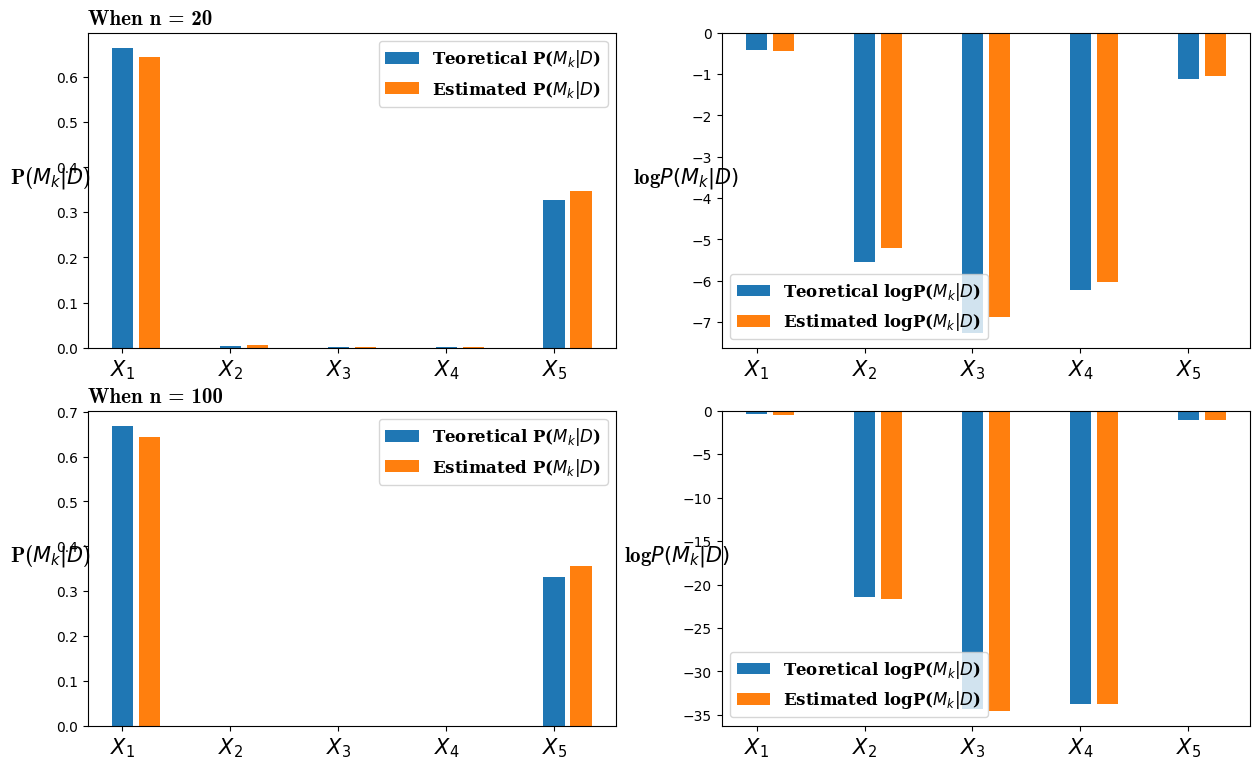

In [3]:
fig, ax = plt.subplots(2, 2, figsize=(15, 9))
gs = gridspec.GridSpec(2, 2, wspace=0.2, hspace=0.2, width_ratios=[1, 1])
np.random.seed(123)
np.set_printoptions(suppress=True, precision=8)

# Data Generation
sigma_true = 1
beta_true = 1
q = 5
xlabels = ['$X_{%d}$'%i for i in range(1, q+1)]
rho = 0.8  # when increasing rho, X1 and X2 are strongly correlated, P(M_2|D) won't be zero. Although true model is y = beta*X1 + eps
muX = np.array([0,0])
SigmaX = np.array([[1, rho],[rho, 1]])
# Prior settings
mu0 = beta_true
lambda0 = 0.1
a0 = b0 = 0.1
    
for i,n in enumerate([20, 100]):
    X = np.zeros((n, q))
    X[:, :2] = scipy.stats.multivariate_normal.rvs(mean = muX, cov = SigmaX, size = n)
    X[:, 2] = scipy.stats.norm.rvs(loc = 0, scale = 1, size = n)
    X[:, 3] = scipy.stats.bernoulli.rvs(p = 0.5, size = n) - 0.5
    X[:, 4] = X[:, 0] * 2
    eps_true = scipy.stats.norm.rvs(loc = 0, scale = sigma_true, size = n)
    Y = beta_true * X[:, 0] + eps_true  # True model

    # Calcluate Theoretical Posteior Model Probability P(D|M_k), P(M_k|D)
    logD_Mk = np.zeros(q)
    for k in range(q):      # refer to page 10 in tutorial slide for the formula
        sumX = np.sum(X[:, k])
        sumX2 = np.sum(X[:, k] ** 2)
        sumXY = np.sum(X[:, k] * Y)
        sumY2 = np.sum(Y ** 2)
        bnew = b0 + 0.5 * (sumY2 + (lambda0 * (mu0 ** 2) * sumX2 - sumXY ** 2 - 2 * lambda0 * mu0 * sumXY) / (lambda0 + sumX2))
        logD_Mk[k] = 0.5 * np.log(lambda0) - 0.5 * np.log(lambda0 + sumX2) - n / 2 * np.log(2 * np.pi) + a0 * np.log(b0) \
                        - (a0 + n / 2) * np.log(bnew) + scipy.special.gammaln(a0 + n / 2) - scipy.special.gammaln(a0)
    D_Mk = np.exp(logD_Mk)
    Mk_D = D_Mk / np.sum(D_Mk)

    # Calcluate Estimated Posteior Model Probability
    simD_Mk = np.zeros(q)
    B = 10000 # larger B makes estimation more accurate
    for k in range(q):
        sigma2 = scipy.stats.invgamma.rvs(a = a0, scale = b0 ,size  = B)
        beta_k = scipy.stats.norm.rvs(loc = mu0, scale = np.sqrt(sigma2 / lambda0))
        # Y follows N(X*beta_k, sigma2), since we compute logf(D), so it's np.sum instead of multiply
        logfD = [np.sum(scipy.stats.norm.logpdf(x = Y, loc = X[:, k] * beta_k[b], scale = np.sqrt(sigma2[b]))) for b in range(B)]
        simD_Mk[k] = np.mean(np.exp(logfD))
    simMk_D = simD_Mk / np.sum(simD_Mk)

    display(Latex('$n$ = %d, Posteior Model Probability $P(M_k|D)$'%n))
    print('  Theoretical:', Mk_D)
    print('  Estimated:  ', simMk_D)

    plt.subplot(gs[i, 0])
    plt.title(label = "When n = %d"%n, loc="left", font='cmb10', fontsize=15)
    plt.xticks(np.arange(q), xlabels, font='cmb10', fontsize=15)
    plt.ylabel("P($M_k|D$)", font='cmb10', rotation='horizontal', fontsize=15) 
    plt.bar(x = np.arange(q), height = Mk_D, fill = 'red', width = 0.8*barwidth, label = 'Teoretical P($M_k|D$)')
    plt.bar(x = np.arange(q)+barwidth, height = simMk_D, fill = 'blue', width = 0.8*barwidth, label = 'Estimated P($M_k|D$)')
    plt.legend(prop=FontProp)

    plt.subplot(gs[i, 1])
    plt.xticks(np.arange(q), xlabels, font='cmb10', fontsize=15)
    plt.ylabel("log$P(M_k|D)$", font='cmb10', rotation='horizontal', fontsize=15)
    plt.bar(x = np.arange(q), height = np.log(Mk_D), fill = 'red', width = 0.8*barwidth, label = 'Teoretical logP($M_k|D$)')
    plt.bar(x = np.arange(q)+barwidth, height = np.log(simMk_D), fill = 'blue', width = 0.8*barwidth, label = 'Estimated logP($M_k|D$)')  
    plt.legend(prop=FontProp)
plt.show()

We can see $P(M_k|D)$ is very small for k=2,3,4. 
<br> When we have more data (n from 20 to 100), $P(M_k|D) \approx 0, k=2,3,4$. $\quad \log P(M_k|D)$ is used to show $P(M_k|D)$ is small.
### Key point of BMA: $P(D|M) =\int{f( D|\theta) f(\theta |M) d\theta}$
Always remember to integrate w.r.t. parameters $\theta$ to make $\theta$ disappear, then you can get $P(D|M)$

## BMLR (Bayesian Multivariate Linear Regression)
Please refer to the tutorial slide

Model: 
<br>
$\begin{align*}
 \begin{array}{ccccc}
 \boldsymbol{Y} &=& \boldsymbol{X}\quad \boldsymbol{B}& +&  \boldsymbol{E},\\
 (n\times m) & &(n\times p) (p \times m) && (n\times m)
 \end{array}
 \end{align*}
$
<br>$\boldsymbol{Y} = \boldsymbol{X} \boldsymbol{B} + \boldsymbol{E},~$$\boldsymbol{\epsilon}_{i} \sim N(\boldsymbol{0}, \boldsymbol{\Sigma}_{\epsilon})$
<br>Given $\boldsymbol{Y}, \boldsymbol{X}$, we want to estimate $\boldsymbol{B}, \boldsymbol{\Sigma}_{\epsilon}$
<br>Priors:
<br>$
\begin{align*}
\pi(\boldsymbol{\Sigma}_{\epsilon}) &\sim \mathcal{W}^{-1}(\boldsymbol{\Psi}_0, {{\nu}}_0) \\
\pi(\boldsymbol{B}|\boldsymbol{\Sigma}_{\epsilon}) &\sim N(\boldsymbol{\mu}_0, \boldsymbol{\Sigma}_{\epsilon} / \lambda_0) 
\end{align*}
$

Draw Nsim samples for $\boldsymbol{\Sigma}_{\epsilon}$ and $\boldsymbol{B}$
<br>$
\boldsymbol{\Sigma}_{\epsilon} \sim \mathcal{W}^{-1} (\nu_0 + n, \boldsymbol{\Psi}_0 + (\boldsymbol{Y} - \boldsymbol{X}\boldsymbol{B}_n)^T (\boldsymbol{Y} -\boldsymbol{X}\boldsymbol{B}_n) +\lambda_0 (\boldsymbol{B}_0 - \boldsymbol{B}_n)^T (\boldsymbol{B}_0 - \boldsymbol{B}_n))
$
<br>$\boldsymbol{B} \sim \text{MatrixNormal}(\boldsymbol{B}_n, (\lambda_0 \boldsymbol{I} + \boldsymbol{X}^T\boldsymbol{X})^{-1}, \boldsymbol{\Sigma}_{\epsilon}) \qquad \text{where} \quad \boldsymbol{B}_n = (\lambda_0 \boldsymbol{I} + \boldsymbol{X}^T\boldsymbol{X})^{-1} (\lambda_0 \boldsymbol{B}_0 + \boldsymbol{X}^T \boldsymbol{Y}) $
<br>Intro to InvWishart: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.invwishart.html
<br>Intro to MatrixNormal: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.matrix_normal.html
<br> Compare the estimated $\boldsymbol{\Sigma}_{\epsilon}$, $\boldsymbol{B}$ with true value.

In [11]:
p, m, n, Nsim = 2, 2, 500, 200000   # larger Nsim makes the estimation more accurate
mu_eps = np.array([0, 0])
Sigma_eps = np.array([[1, 0.3],[0.3, 1]])  # true value
B = np.array([[1, 2], [2, 0.5]])           # true value

E = scipy.stats.multivariate_normal.rvs(mean = mu_eps, cov = Sigma_eps, size = n)  # shape (n, 2)
X = np.stack((np.ones(n), norm.rvs(size=n)), axis=1)  # shape (n, 2)
Y = np.dot(X, B) + E

# Prior
lambda0, v0 = 0.01, 0.01
Psi0, B0 = np.zeros((m, m)), np.zeros((p, m))  # B0 is \mu_0
B_sim = np.zeros((Nsim, 2, 2))

# BMLR
XTX_inv = np.linalg.inv(lambda0 * np.eye(p) + np.dot(np.transpose(X), X))
Bn = np.dot(XTX_inv, lambda0 * B0 + np.dot(np.transpose(X), Y))
Psi_new = Psi0 + np.dot( np.transpose(Y - np.dot(X, Bn)), Y - np.dot(X, Bn)) + lambda0 * np.dot(np.transpose(B0 - Bn), B0 - Bn)
Sigma_sim = scipy.stats.invwishart.rvs(df = v0 + n, scale = Psi_new, size = Nsim)  # posterior of sigma
for i in range(Nsim):
    B_sim[i, :, :] = scipy.stats.matrix_normal.rvs(mean = Bn, rowcov = Sigma_sim[i,:,:], colcov = XTX_inv, size = 1)  # posterior of B
PostMean_B, PostMean_Sigma = np.mean(B_sim, axis=0), np.mean(Sigma_sim, axis=0)

print('Estimated Posterior Mean of B:\n', PostMean_B)
display(Latex('Estimated Posterior Mean of $\ \\boldsymbol{\Sigma}_{\epsilon}:$'), PostMean_Sigma)

Estimated Posterior Mean of B:
 [[0.95951374 2.04061138]
 [1.93103716 0.50108646]]


<IPython.core.display.Latex object>

array([[1.03436205, 0.30380316],
       [0.30380316, 0.99567353]])

We can see the estimated $B$ and $\varSigma _{\varepsilon}$ are close to the true value.
## Visualization of $B$, $\varSigma _{\varepsilon}$ and true value

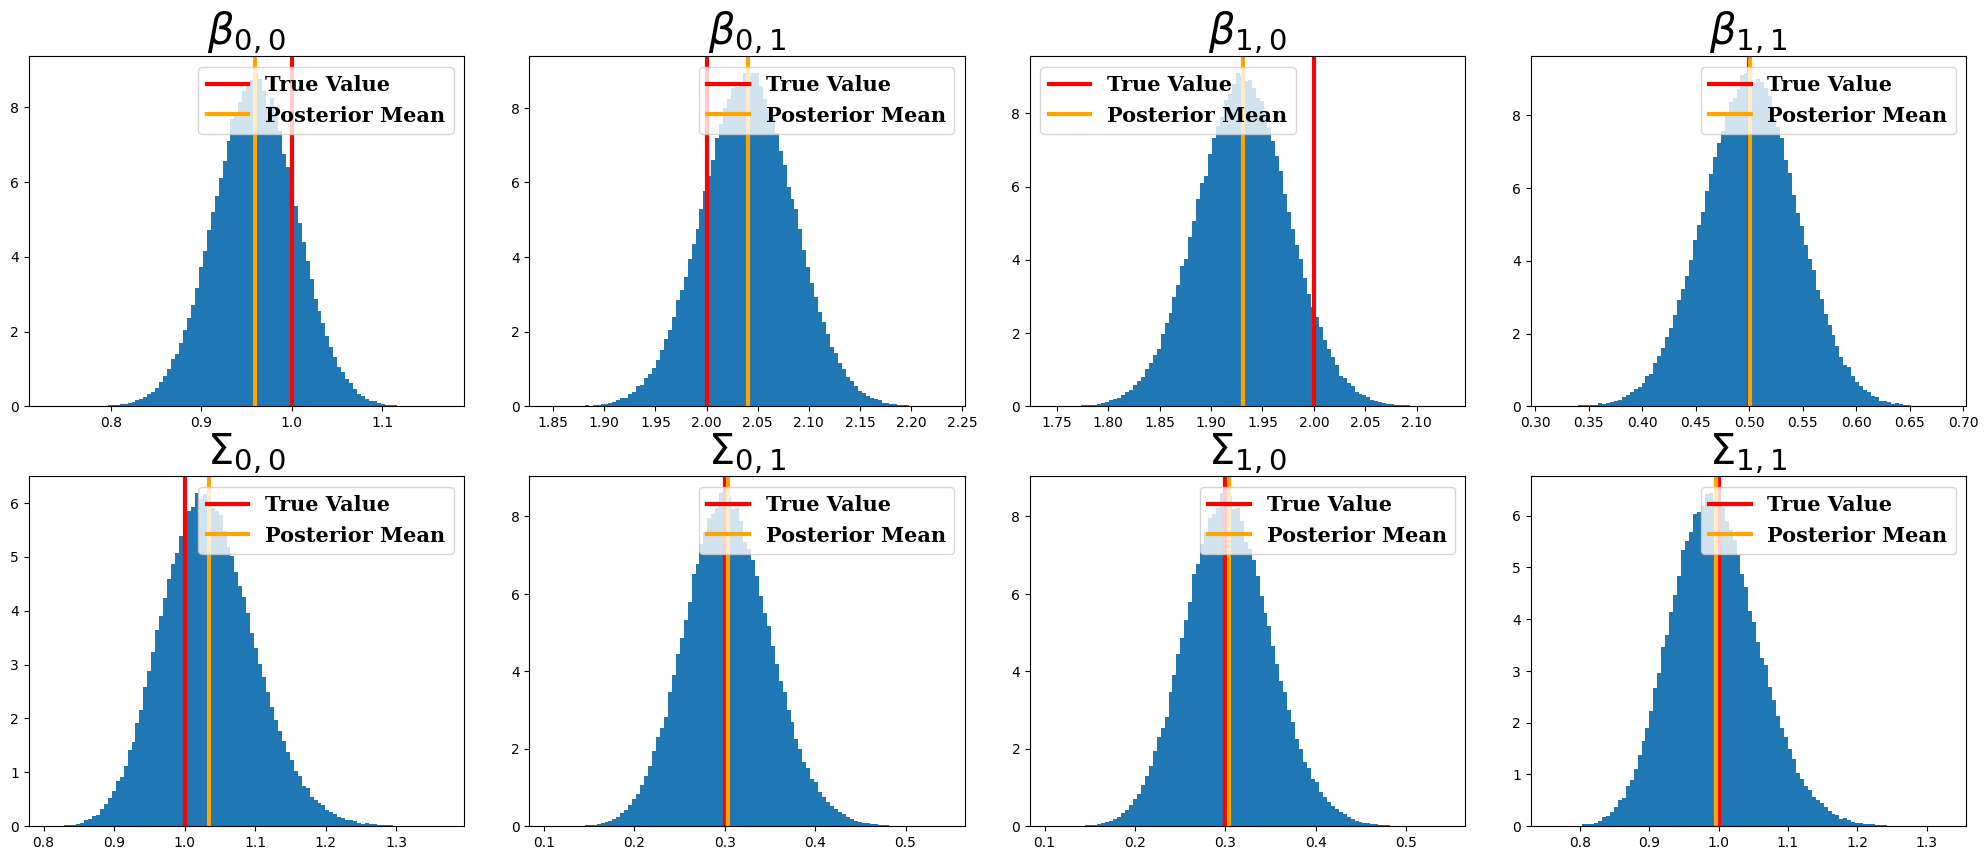

In [12]:
fig, ax = plt.subplots(2, 4, figsize=(25, 10))
gs = gridspec.GridSpec(2, 4, wspace=0.15, hspace=0.2, width_ratios=[1, 1, 1, 1])
FontProp = fm.FontProperties(family='serif', weight='semibold', style='normal', size=15)

for k in range(4):
    i, j = k//2, k%2
    plt.subplot(gs[0, k])   
    plt.title('$\\beta_{%d, %d}$'%(i, j), fontsize=30)
    plt.axvline(x = B[i, j], color = 'red', linewidth = 3, label = 'True Value')
    plt.axvline(x = PostMean_B[i, j], color = 'orange', linewidth = 3, label = 'Posterior Mean')
    plt.hist(B_sim[:, i, j], bins = 100, density = True)
    plt.legend(prop=FontProp)

    plt.subplot(gs[1, k])   
    plt.title('$\\Sigma_{%d, %d}$'%(i, j), fontsize=30)
    plt.axvline(x = Sigma_eps[i, j], color = 'red', linewidth = 3, label = 'True Value')
    plt.axvline(x = PostMean_Sigma[i, j], color = 'orange', linewidth = 3, label = 'Posterior Mean')
    plt.hist(Sigma_sim[:, i, j], bins=100, density=True)
    plt.legend(prop=FontProp)
plt.show()